[Notebook of task](https://github.com/DistributedSystemsGroup/Algorithmic-Machine-Learning/blob/master/Challenges/Anomaly_Detection/anomaly_detection_challenge.ipynb)

In [2]:
import os
import sys
import re
import random
import matplotlib
import implicit
import warnings
# For data manipulation
import pandas as pd
import numpy as np
# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
# For prediction
from tqdm import tqdm

basepath = "/mnt/datasets/anomaly/"

In [3]:
column_names = [
    "SessionNumber", 
    "SystemID",
    "Date",
    "HighPriorityAlerts", 
    "Dumps",
    "CleanupOOMDumps",
    "CompositeOOMDums",
    "IndexServerRestarts",
    "NameServerRestarts",
    "XSEngineRestarts",
    "PreprocessorRestarts",
    "DaemonRestarts",
    "StatisticsServerRestarts",
    "CPU",
    "PhysMEM",
    "InstanceMEM",
    "TablesAllocation", 
    "IndexServerAllocationLimit",
    "ColumnUnloads",
    "DeltaSize",
    "MergeErrors",
    "BlockingPhaseSec", 
    "Disk",
    "LargestTableSize",
    "LargestPartitionSize",
    "DiagnosisFiles",
    "DiagnosisFilesSize",
    "DaysWithSuccessfulDataBackups",
    "DaysWithSuccessfulLogBackups",
    "DaysWithFailedDataBackups",
    "DaysWithFailedfulLogBackups",
    "MinDailyNumberOfSuccessfulDataBackups",
    "MinDailyNumberOfSuccessfulLogBackups",
    "MaxDailyNumberOfFailedDataBackups",
    "MaxDailyNumberOfFailedLogBackups",
    "LogSegmentChange",
    "Check1",
    "Check2",
    "Check3",
    "Check4",
    "Check5",
    "Check6",
    "Check7",
    "Check8"
]

labels = ["Check1", "Check2", "Check3", "Check4", "Check5", "Check6", "Check7", "Check8"]

In [4]:
dataDF = pd.read_csv(basepath + 'data.csv', delimiter=";", header=None, names=column_names)

In [5]:
dataDF.head()

,SessionNumber,SystemID,Date,HighPriorityAlerts,Dumps,CleanupOOMDumps,CompositeOOMDums,IndexServerRestarts,NameServerRestarts,XSEngineRestarts,...,MaxDailyNumberOfFailedLogBackups,LogSegmentChange,Check1,Check2,Check3,Check4,Check5,Check6,Check7,Check8
0,0,0,16/01/2017 04:04,1,0.0,0.0,0.0,0,0,0,...,0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0
1,1,1,06/02/2017 04:03,0,0.0,0.0,0.0,0,0,0,...,0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0
2,2,1,20/02/2017 04:03,0,0.0,0.0,0.0,0,0,0,...,0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0
3,3,2,13/02/2017 04:44,1,0.0,0.0,0.0,0,0,0,...,0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0
4,4,3,06/02/2017 04:31,1,0.0,0.0,0.0,0,0,0,...,0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0


In [40]:
#create a copy of the label columns for exploration
anomaliesDF = dataDF.filter(labels, axis=1)

# percentage of NA in each label 
print(anomaliesDF.isna().mean().round(4) * 100) 

anomaliesDF_withoutNA = anomaliesDF.fillna(0)

Check1    8.540
Check2    8.530
Check3    7.860
Check4   12.770
Check5   12.210
Check6    2.570
Check7   12.450
Check8    0.020
dtype: float64


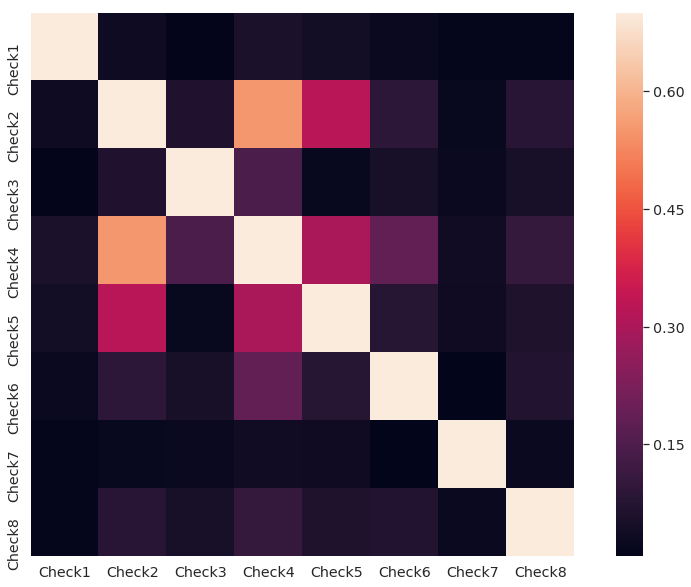

In [65]:
sns.set(font_scale=1.3)

matrix = anomaliesDF.corr()
figure, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(data=matrix, vmax=0.7, square=True)

In [49]:
counted_anomaliesDF = anomaliesDF_withoutNA.apply(pd.value_counts)

In [50]:
counted_anomaliesDF.loc["Total"] = counted_anomaliesDF.sum()
counted_anomaliesDF.loc["PercentageAnomalies"] = (counted_anomaliesDF.iloc[1] / counted_anomaliesDF.iloc[2]).round(5)*100


In [51]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

counted_anomaliesDF

,Check1,Check2,Check3,Check4,Check5,Check6,Check7,Check8
0.0,285395.000,278267.000,278938.000,262216.000,283951.000,206459.000,279343.000,284112.000
1.0,1636.000,8764.000,8093.000,24815.000,3080.000,80572.000,7688.000,2919.000
Total,287031.000,287031.000,287031.000,287031.000,287031.000,287031.000,287031.000,287031.000
PercentageAnomalies,0.570,3.053,2.820,8.645,1.073,28.071,2.678,1.017


Text(0.5,1,'Percentage of anomalies in each label')

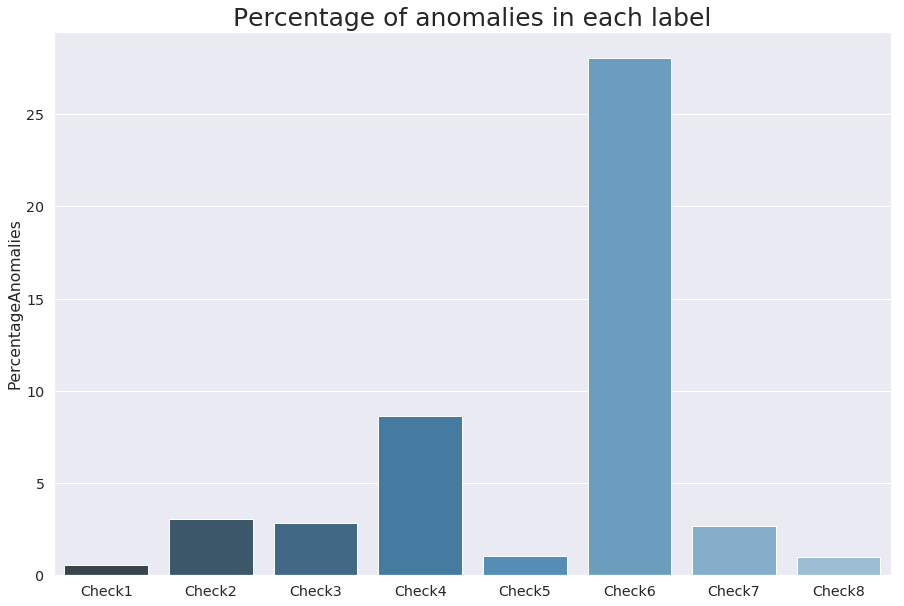

In [60]:
y = counted_anomaliesDF.loc["PercentageAnomalies"]
x = labels

figure, ax = plt.subplots(figsize=(15,10))
ax = sns.barplot(y=y, x=x, palette="Blues_d")

ax.set_title('Percentage of anomalies in each label', fontsize=25)